# 📢 **File explanation!!**
Exploratory Data Analysis (EDA) processing on this file is carried out with all data that has not been processed at all.

# 📢 **Dataset tweet explanation!!**

This tweet dataset consists of 2 columns, namely
- Sentiment <br>
   Contains categories (positive, neutral, and negative) of tweets
- Tweets <br>
   This section contains sentiment sentences

Then I have also looked at some data from the tweet dataset that will be loaded in step 1. I found several things like the following:

- Data contains `@`
- The data contains emojis in forms such as `ðŸ‘‡`
- Data contains `#`
- Data contains links
- Data contains numbers
- Data contains abbreviations and slang words
- There is data that uses capital letters
- There is data that contains dates

# 🎯 **Step 0: Import library**
---

In [ ]:
!pip install imojify

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import json
import nltk
import re

from imojify import imojify
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from itertools import islice, chain
from nltk.tokenize import word_tokenize
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
from sklearn.feature_extraction.text import CountVectorizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 26.5 MB/s eta 0:00:00


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
plt.style.use('seaborn-v0_8')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 🎯 **Step 1: Load dataset**
---

🔎 In this section, I will load several datasets that will be used for sentiment analysis, including datasets of tweets, slang words, and emojis. It should be noted that the slang words dataset will only be used at the preprocessing stage, not at the EDA stage. My first step is to introduce the dataset that will be used in this sentiment analysis.

## ✨ 1.1 - Dataset tweet

In [ ]:
path =  '/content/drive/MyDrive/INDONESIA AI/Sentiment Analysis/Dataset/df_tweet.csv'

df_sentiment = pd.read_csv(path)

df_sentiment.head()

,sentimen,tweet
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,negatif,Negara kita ngutang buat bngun infrastruktur y...


## ✨ 1.2 - Dataset slang words

In [ ]:
def load_dataset_slang(path):

  with open(path, 'r') as file:

    slang_words = json.load(file)

  return slang_words


def print_data(data):

  for key, value in islice(data.items(), 5):

    print(key, value)

In [ ]:
path = [
    '/content/drive/MyDrive/INDONESIA AI/Sentiment Analysis/Dataset/Slang Words/json_slang_words1',
    '/content/drive/MyDrive/INDONESIA AI/Sentiment Analysis/Dataset/Slang Words/json_slang_words2',
    '/content/drive/MyDrive/INDONESIA AI/Sentiment Analysis/Dataset/Slang Words/json_slang_words3'
]

slang_words1 = load_dataset_slang(path[0])

slang_words2 = load_dataset_slang(path[1])

slang_words3 = load_dataset_slang(path[2])

In [ ]:
print_data(slang_words1)

@ di
abis habis
ad ada
adlh adalah
afaik as far as i know


In [ ]:
print_data(slang_words2)

aamiin amin 
adek adik 
adlh adalah 
aer air 
aiskrim es krim 


In [ ]:
print_data(slang_words3)

woww wow
aminn amin
met selamat
netaas menetas
keberpa keberapa


## ✨ 1.3 - Dataset emoji

In [ ]:
path =  '/content/drive/MyDrive/INDONESIA AI/Sentiment Analysis/Dataset/df_emoji.csv'

df_emoji = pd.read_csv(path)

df_emoji.head()

,emoji-symbol,meaning,meaning-indo,emoji-unicode,emoji-name,emoji-name-indo
0,😄,smiley,tersenyum,ðŸ˜„,grinning face with smiling eyes,wajah menyeringai dengan mata tersenyum
1,😃,smiley,tersenyum,ðŸ˜ƒ,grinning face with big eyes,wajah menyeringai dengan mata besar
2,😀,smiley,tersenyum,ðŸ˜€,grinning face,wajah menyeringai
3,😊,smiley,tersenyum,ðŸ˜Š,smiling face with smiling eyes,wajah tersenyum dengan mata tersenyum
4,🙂,blush,memerah,â˜ºï¸,slightly smiling face,Wajah yang sedikit tersenyum


In [ ]:
emoji_dict = dict(zip(df_emoji['emoji-unicode'], df_emoji['meaning-indo']))

print_data(emoji_dict)

ðŸ˜„ tersenyum
ðŸ˜ƒ tersenyum
ðŸ˜€ tersenyum
ðŸ˜Š tersenyum
â˜ºï¸ memerah


# 🎯 **Step 2: Check data info**

---



In [ ]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  1815 non-null   object
 1   tweet     1815 non-null   object
dtypes: object(2)
memory usage: 28.5+ KB


🚧 Based on the information above, it can be seen that the total distribution for each column is the same

# 🎯 **Step 3: Check the amount of data for each class in the sentiment column**

---



In [ ]:
sentiment_counts = df_sentiment['sentimen'].value_counts(ascending=True)

sentiment_counts

negatif    596
netral     607
positif    612
Name: sentimen, dtype: int64

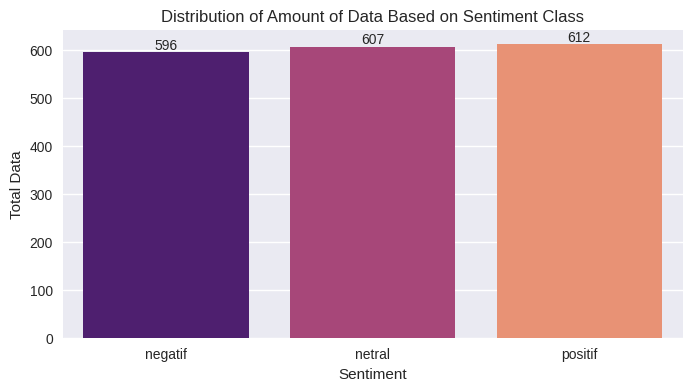

In [ ]:
plt.figure(figsize=(8, 4))

ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='magma')

for p in ax.containers:
  ax.bar_label(p,)

plt.xlabel('Sentiment')

plt.ylabel('Total Data')

plt.title('Distribution of Amount of Data Based on Sentiment Class')

plt.show()

🚧 Based on the information above, it can be seen that the amount of data for each class is not very different so I will not apply oversampling or undersampling.

# 🎯 **Step 4: Check tweet length**

---



🔎 In stage 5, I checked the length of the tweets for each class by dividing the text based on spaces and entering the results in a new column, namely tweet_length (feature engineering) according to each data

## ✨ 5.1 - Barplot

In [ ]:
df_sentiment['tweet_length'] = df_sentiment['tweet'].str.split(' ').apply(len)

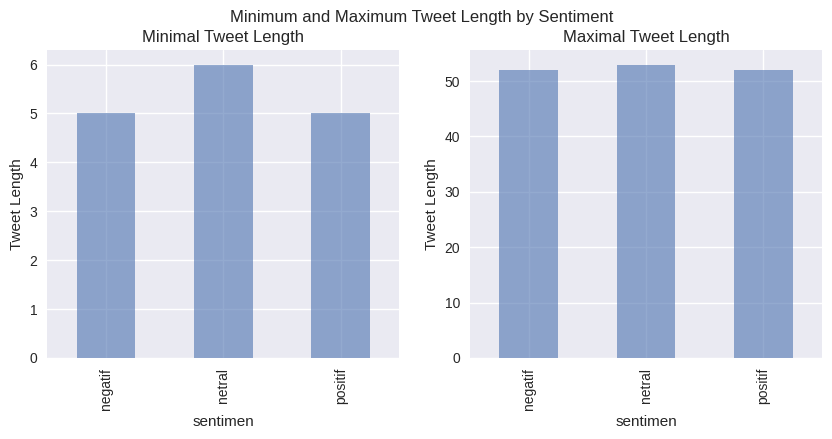

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

fig.suptitle('Minimum and Maximum Tweet Length by Sentiment')


df_sentiment.groupby('sentimen')['tweet_length'].min().plot(kind='bar', ax=axes[0], alpha=0.6)

axes[0].set_title('Minimal Tweet Length')

axes[0].set_ylabel('Tweet Length')


df_sentiment.groupby('sentimen')['tweet_length'].max().plot(kind='bar', ax=axes[1], alpha=0.6)

axes[1].set_title('Maximal Tweet Length')

axes[1].set_ylabel('Tweet Length')

plt.show()

🚧 Based on the information in graph 5.1 it can be seen as follows:

- The classes that have the shortest tweets are the negative and positive classes with around 5 words
- The class that has the longest tweet is the neutral class

## ✨ 5.2 - Boxplot

In [ ]:
distribution = df_sentiment[['sentimen', 'tweet_length']]

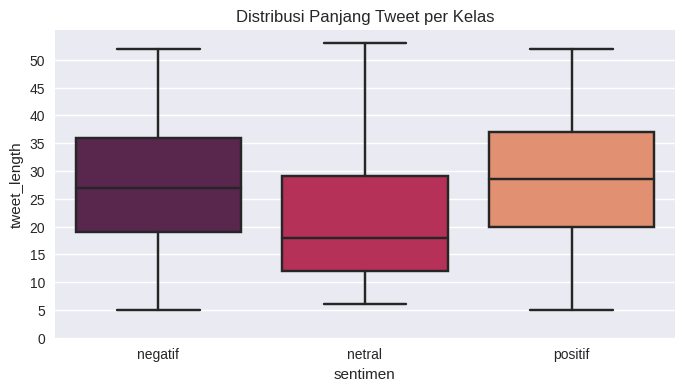

In [ ]:
plt.figure(figsize=(8, 4))

ax = sns.boxplot(x='sentimen', y='tweet_length', data=distribution, palette='rocket')

plt.title('Distribusi Panjang Tweet per Kelas')

plt.yticks(range(0, max(df_sentiment['tweet_length']) + 1, 5))

plt.show()


🚧 Based on the information in graph 5.2 it can be seen as follows:
- In the negative class the average tweet length is around 27 words
- In the neutral class the average tweet length is around 18 words
- In the positive class the average tweet length is around 29 words

So the class that has the longest average tweet length is the positive class

# 🎯 **Step 5: Check the words unigram, bigram, trigrams that often appear**

---


🔎 At this stage I used the `CountVectorizer` library from Sklearn to calculate the frequency of occurrence of words from unigrams, bigrams and trigrams. Then I filter to display the top 20 words that have the most occurrences


In [ ]:
def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):

    vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range)

    X = vectorizer.fit_transform(corpus)

    words = vectorizer.get_feature_names_out()

    freqs = X.sum(axis=0).A1

    df = pd.DataFrame({'Word': words, 'Frequency': freqs})

    df = df.sort_values(by='Frequency', ascending=False).head(n).reset_index(drop=True)

    return df

def plot_to_graph(plot_data):

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

    for i, plot_info in enumerate(plot_data):

        row = i // 2

        col = i % 2

        ax = axes[row, col]

        sns.barplot(data=plot_info['data'], x='Frequency', y='Word', palette='rocket', ax=ax)

        for p in ax.patches:
            ax.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width(), p.get_y() + 0.5), ha='right', va='center', color='white')

        ax.set_title(plot_info['title'])

    plt.tight_layout()

    plt.show()

In [ ]:
df_positive = df_sentiment[df_sentiment['sentimen'] == 'positif']

df_neutral = df_sentiment[df_sentiment['sentimen'] == 'netral']

df_negative = df_sentiment[df_sentiment['sentimen'] == 'negatif']

## ✨ 6.1 - Unigram

In [ ]:
stop_words = None

n = 7

unigram = get_top_ngrams(df_sentiment['tweet'], (1, 1), stop_words, n)

unigram_positive = get_top_ngrams(df_positive['tweet'], (1, 1), stop_words, n)

unigram_neutral = get_top_ngrams(df_neutral['tweet'], (1, 1), stop_words, n)

unigram_negative = get_top_ngrams(df_negative['tweet'], (1, 1), stop_words, n)


🚧 The output results from the code above are as follows

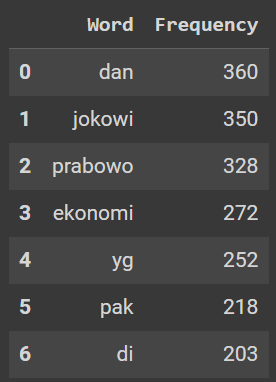

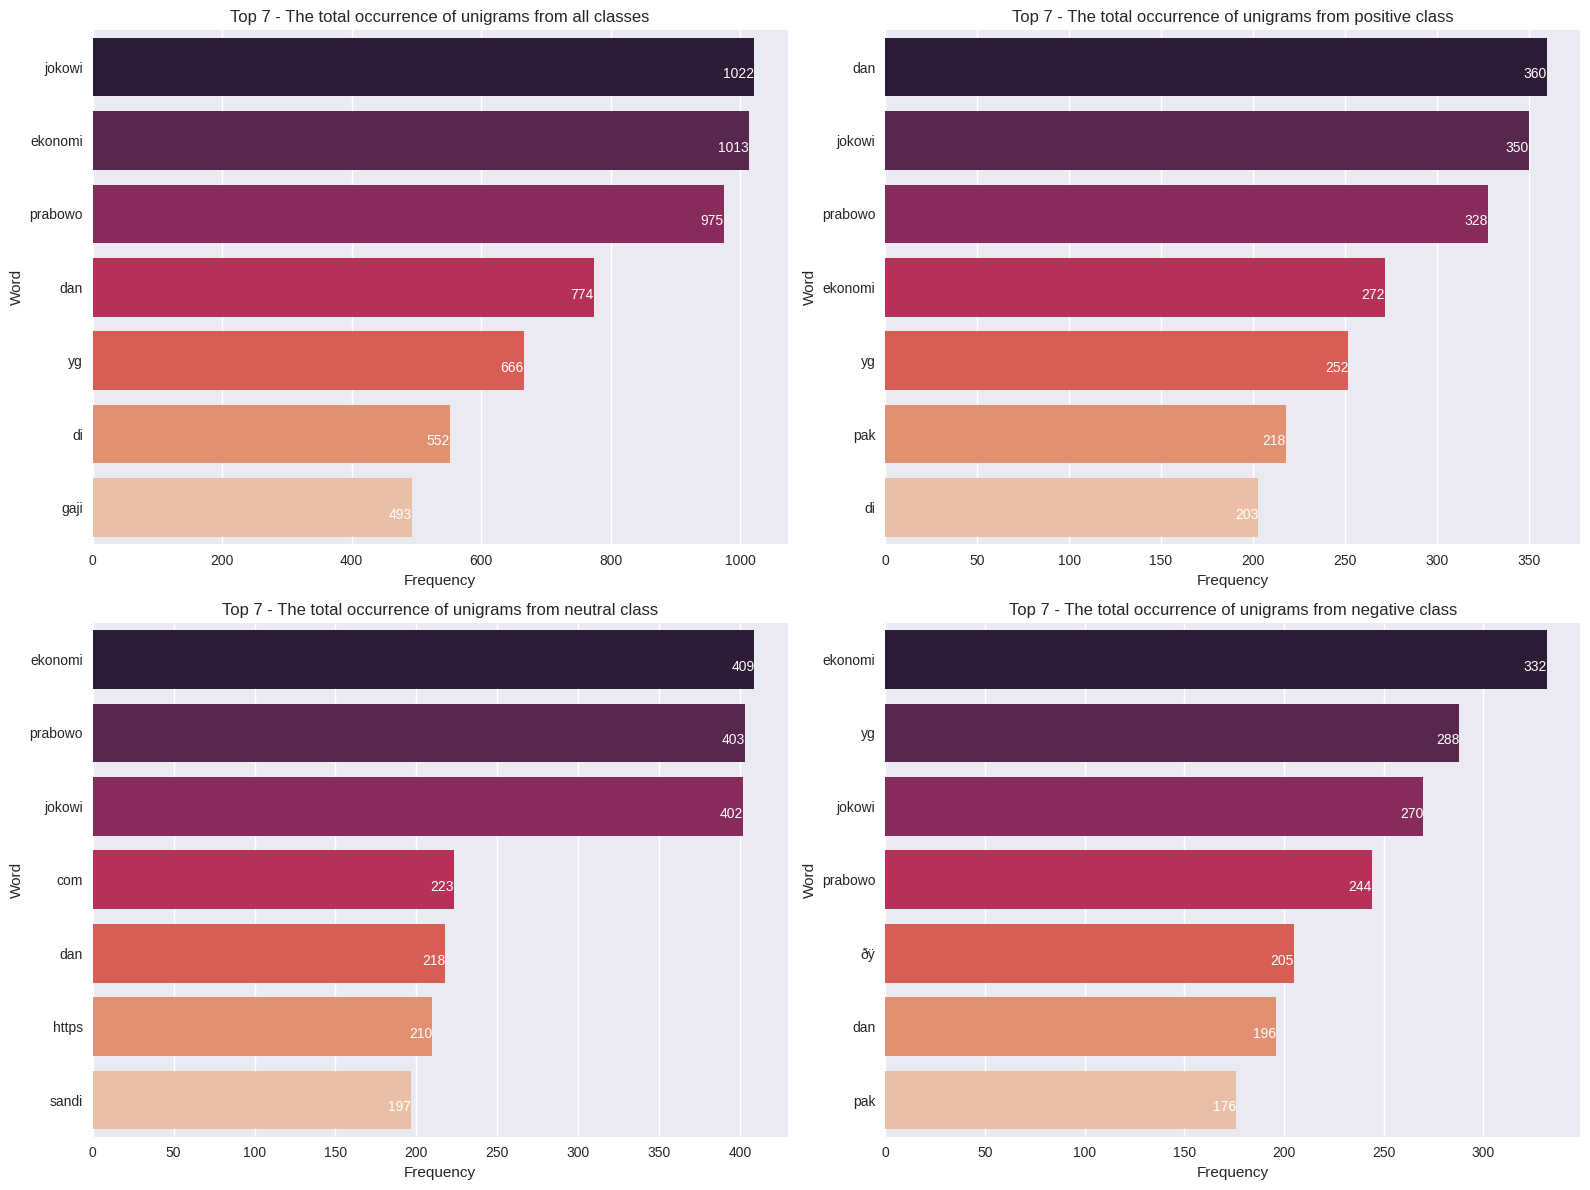

In [ ]:
plot_data = [

    {'data': unigram, 'title': 'Top 7 - The total occurrence of unigrams from all classes'},

    {'data': unigram_positive, 'title': 'Top 7 - The total occurrence of unigrams from positive class'},

    {'data': unigram_neutral, 'title': 'Top 7 - The total occurrence of unigrams from neutral class'},

    {'data': unigram_negative, 'title': 'Top 7 - The total occurrence of unigrams from negative class'}
]

plot_to_graph(plot_data)

🚧 Based on the graphic information above, it is known that the neutral class and the negative class both have the word 'economics' as the word that appears the most. Meanwhile, for the positive class, the word `and` is the one that appears the most

## ✨ 6.2 - Bigram

In [ ]:
bigram = get_top_ngrams(df_sentiment['tweet'], (2, 2), stop_words, n)

bigram_positive = get_top_ngrams(df_positive['tweet'], (2, 2), stop_words, n)

bigram_neutral = get_top_ngrams(df_neutral['tweet'], (2, 2), stop_words, n)

bigram_negative = get_top_ngrams(df_negative['tweet'], (2, 2), stop_words, n)


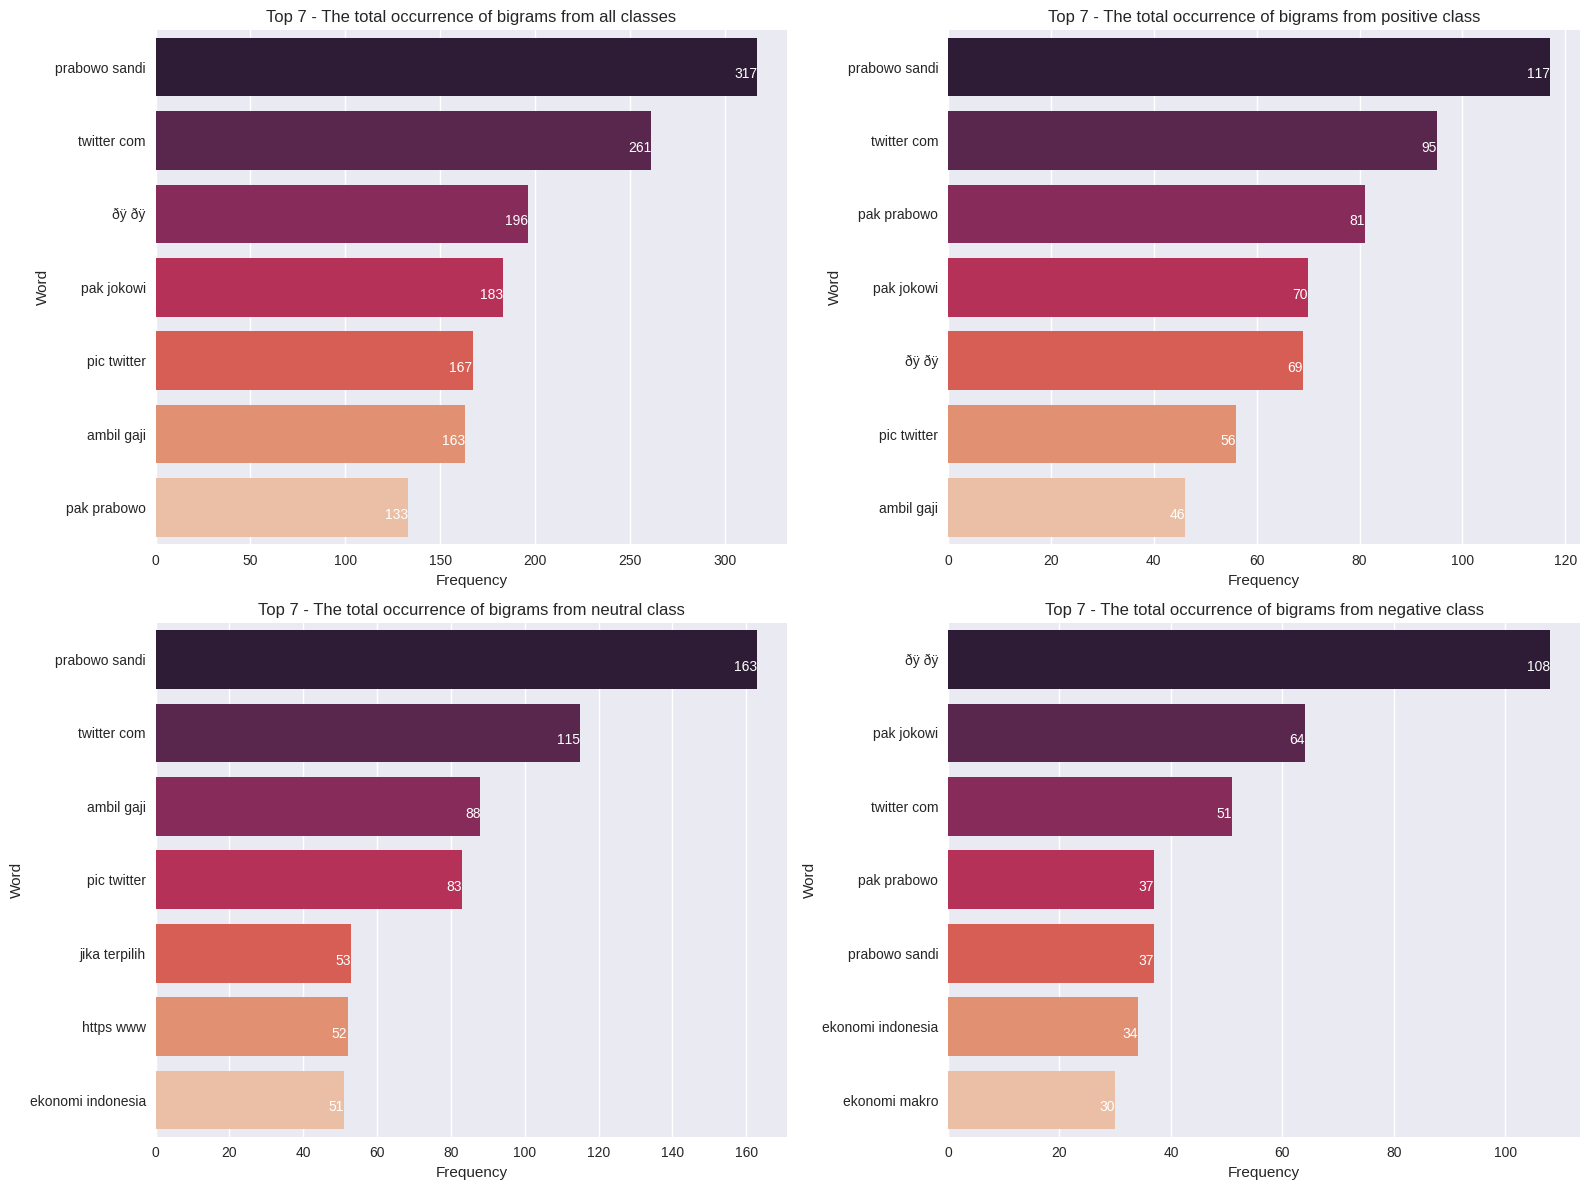

In [ ]:
plot_data = [

    {'data': bigram, 'title': 'Top 7 - The total occurrence of bigrams from all classes'},

    {'data': bigram_positive, 'title': 'Top 7 - The total occurrence of bigrams from positive class'},

    {'data': bigram_neutral, 'title': 'Top 7 - The total occurrence of bigrams from neutral class'},

    {'data': bigram_negative, 'title': 'Top 7 - The total occurrence of bigrams from negative class'}
]

plot_to_graph(plot_data)

🚧 Based on the graphic information above, it is known that the neutral class and the positive class both have the word `prabowo sandi` as the word that appears the most. Meanwhile, for the negative class, the word that appears the most is emoji (in Unicode)

## ✨ 6.3 - Trigram

In [ ]:
trigram = get_top_ngrams(df_sentiment['tweet'], (3, 3), stop_words, n)

trigram_positive = get_top_ngrams(df_positive['tweet'], (3, 3), stop_words, n)

trigram_neutral = get_top_ngrams(df_neutral['tweet'], (3, 3), stop_words, n)

trigram_negative = get_top_ngrams(df_negative['tweet'], (3, 3), stop_words, n)


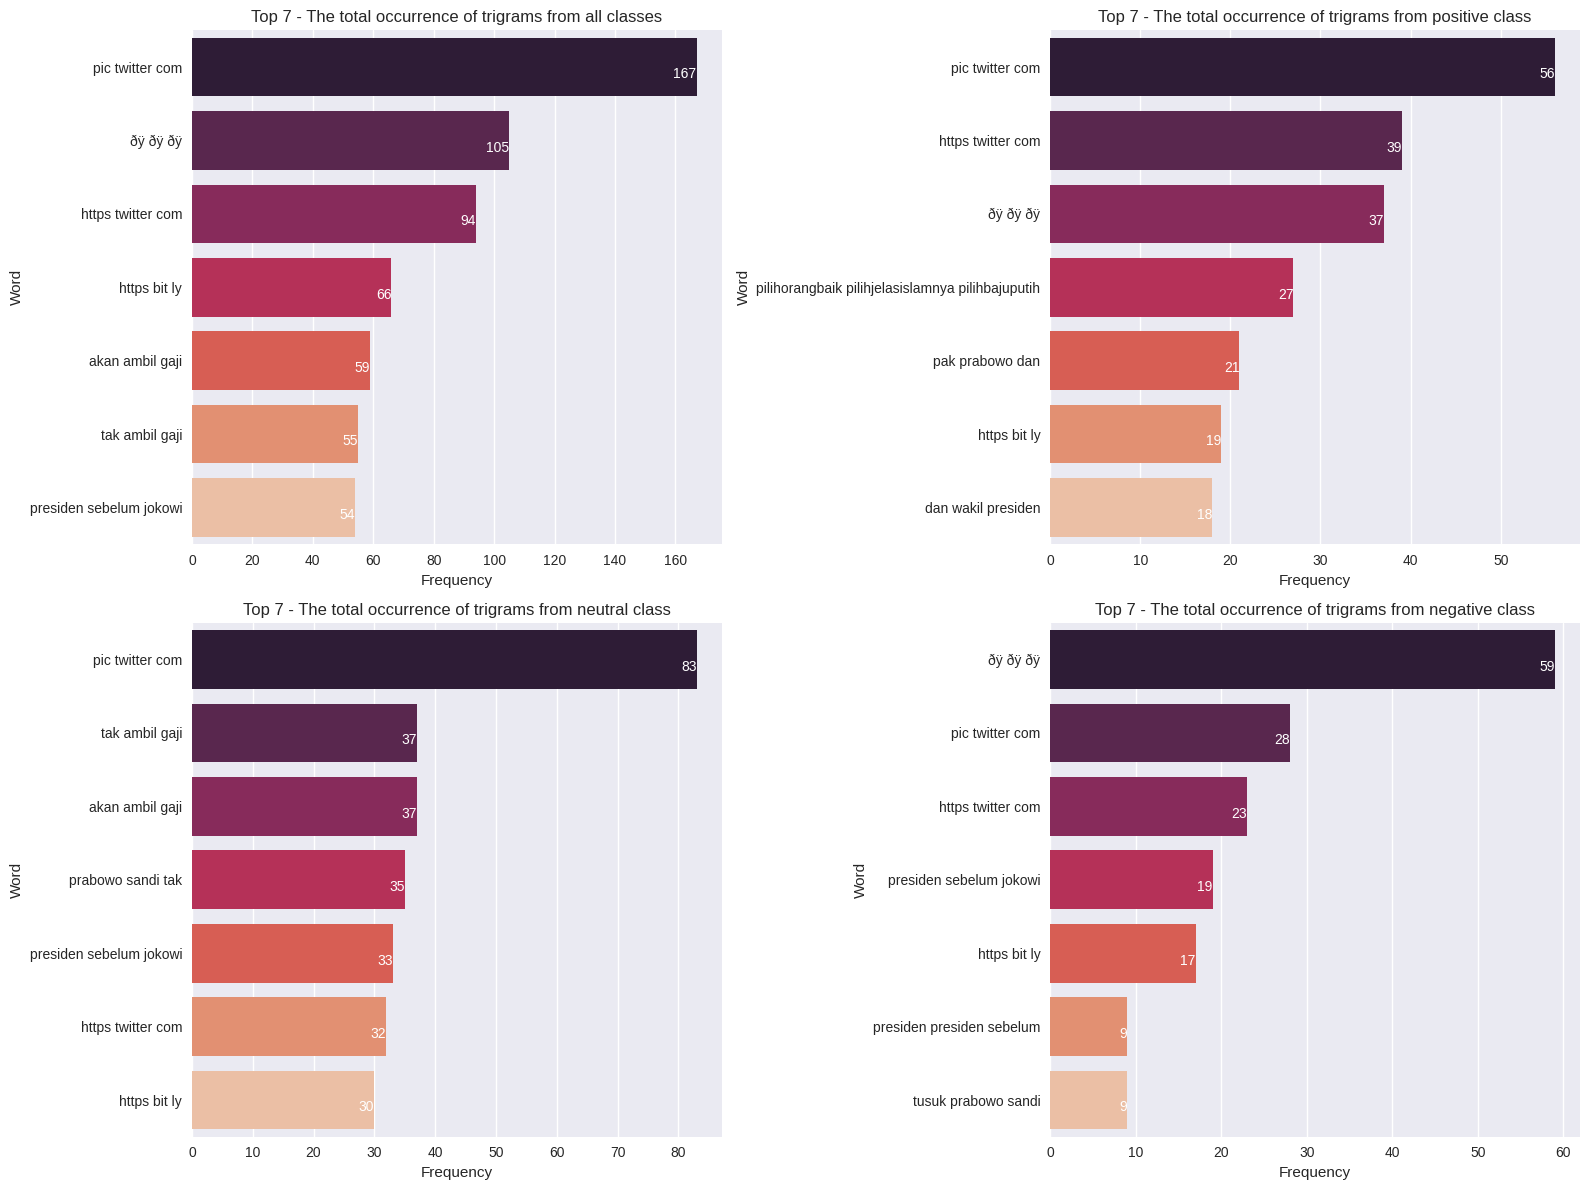

In [ ]:
plot_data = [

    {'data': trigram, 'title': 'Top 7 - The total occurrence of trigrams from all classes'},

    {'data': trigram_positive, 'title': 'Top 7 - The total occurrence of trigrams from positive class'},

    {'data': trigram_neutral, 'title': 'Top 7 - The total occurrence of trigrams from neutral class'},

    {'data': trigram_negative, 'title': 'Top 7 - The total occurrence of trigrams from negative class'}
]

plot_to_graph(plot_data)

🚧 Based on the graphic information above, it is known that the neutral class and the positive class both have the word `pic twitter com` as the word that appears the most. Meanwhile, for the negative class, the word that appears the most is emoji (in Unicode)

# 🎯 **Step 6: Check the wordcloud**

---


🔎 At this stage I display a wordcloud from each class of course with additions from all classes

In [ ]:
def create_wordcloud(palette, data_target):

    sentiment_data = ' '.join(data_target)

    wordcloud = WordCloud(background_color='black', colormap=palette, collocations=False).generate(sentiment_data)

    return wordcloud

def plot_wordcloud(plot_data):

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 9))

    for i, plot_info in enumerate(plot_data):

        row = i // 2

        col = i % 2

        ax = axes[row, col]

        ax.imshow(plot_info['data'], interpolation='bilinear')

        ax.axis("off")

        ax.set_title(plot_info['title'], fontsize=28)

    plt.tight_layout()

    plt.show()

In [ ]:
wordcloud_all = create_wordcloud('rocket', df_sentiment['tweet'])

wordcloud_positive = create_wordcloud('Greens', df_positive['tweet'])

wordcloud_neutral = create_wordcloud('Blues', df_neutral['tweet'])

wordcloud_negative = create_wordcloud('Reds', df_negative['tweet'])

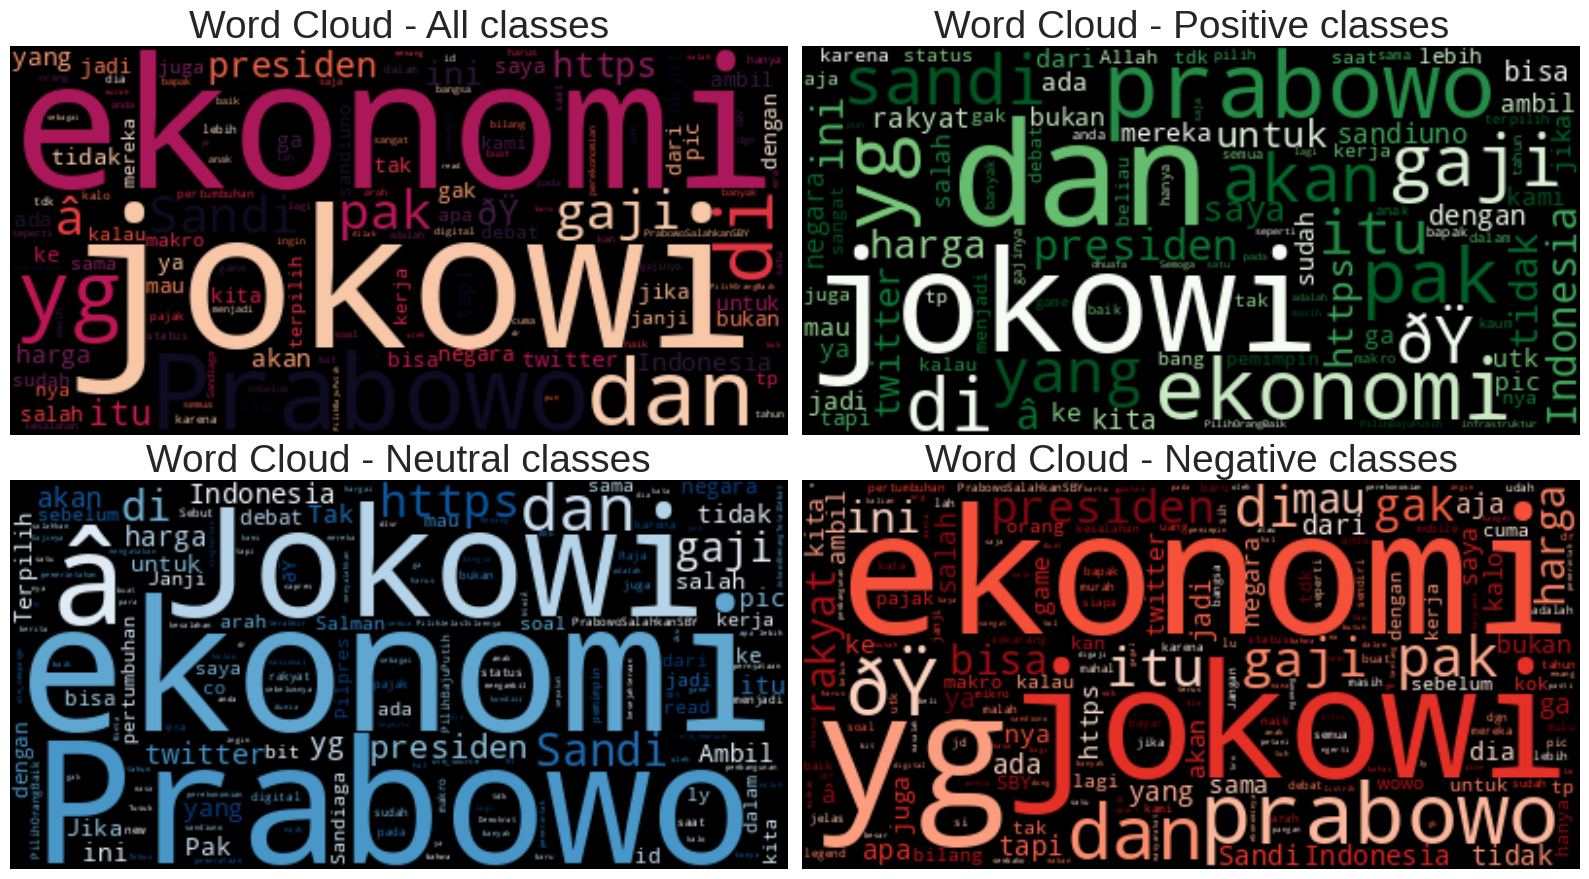

In [ ]:
# Contoh penggunaan
plot_data = [

    {'data': wordcloud_all , 'title': 'Word Cloud - All classes'},

    {'data': wordcloud_positive, 'title': 'Word Cloud - Positive classes'},

    {'data': wordcloud_neutral, 'title': 'Word Cloud - Neutral classes'},

    {'data': wordcloud_negative, 'title': 'Word Cloud - Negative classes'}
]

plot_wordcloud(plot_data)

# 🎯 **Step 7: Check the most frequently used hashtags and understand its impact**
---


🔎 Stage 7 I checked the 7 hashtags that were written the most during the 2019 election, which of course was based on sentiment class. Then I try to understand the role of hashtags in a sentiment, whether they support that sentiment category or not.

In [ ]:
def hashtag_extract(x):

    hashtags = []    # Loop over the words in the tweet

    for i in x:

        ht = re.findall(r"#(\w+)", i)

        hashtags.append(ht)

    return hashtags

def convert_to_dataframe(fdist, top_n=7):

    freq_dist_dict = dict(fdist.most_common(top_n))

    df = pd.DataFrame(list(freq_dist_dict.items()), columns=['Word', 'Frequency'])

    return df

In [ ]:
hashtag_all = hashtag_extract(df_sentiment['tweet'])

hashtag_positive = hashtag_extract(df_positive['tweet'])

hashtag_neutral = hashtag_extract(df_neutral['tweet'])

hashtag_negative = hashtag_extract(df_negative['tweet'])

🚧 The result of the coding above is an array within an array, as follows

```Python
[
  [],
  [],
  ['UASdifitnahKejiBalasDiTPS', 'UASdifitnahKejiBalasDiTPS'],
  ['PilihOrangBaik', 'PilihJelasIslamnya', 'PilihBajuPutih'],
  ['2019JokowiKyaiMaruf'],
  ....
]
```

🔎 Then I made 1 single list with the code below



In [ ]:
hashtag_all = list(chain.from_iterable(hashtag_all))

hashtag_positive = list(chain.from_iterable(hashtag_positive))

hashtag_neutral = list(chain.from_iterable(hashtag_neutral))

hashtag_negative = list(chain.from_iterable(hashtag_negative))

🚧 The output results from the code above are as follows

```Python
['UASdifitnahKejiBalasDiTPS',
 'UASdifitnahKejiBalasDiTPS',
 'PilihOrangBaik',
 'PilihJelasIslamnya',
 'PilihBajuPutih',
 '2019JokowiKyaiMaruf',
 ....
]
```



In [ ]:
hashtag_all = convert_to_dataframe(Counter(hashtag_all))

hashtag_positive = convert_to_dataframe(Counter(hashtag_positive))

hashtag_neutral = convert_to_dataframe(Counter(hashtag_neutral))

hashtag_negative = convert_to_dataframe(Counter(hashtag_negative))

🚧 The output results from the code above are as follows

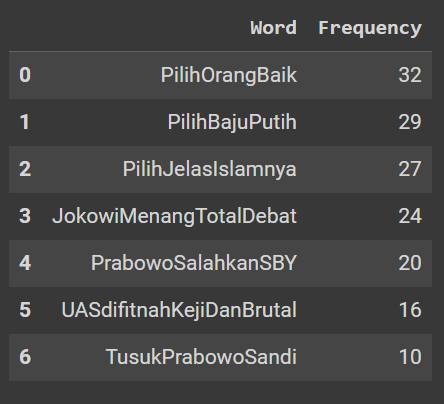

🔎 Then I displayed it using the `plot_to_graph` function coding from Step 5

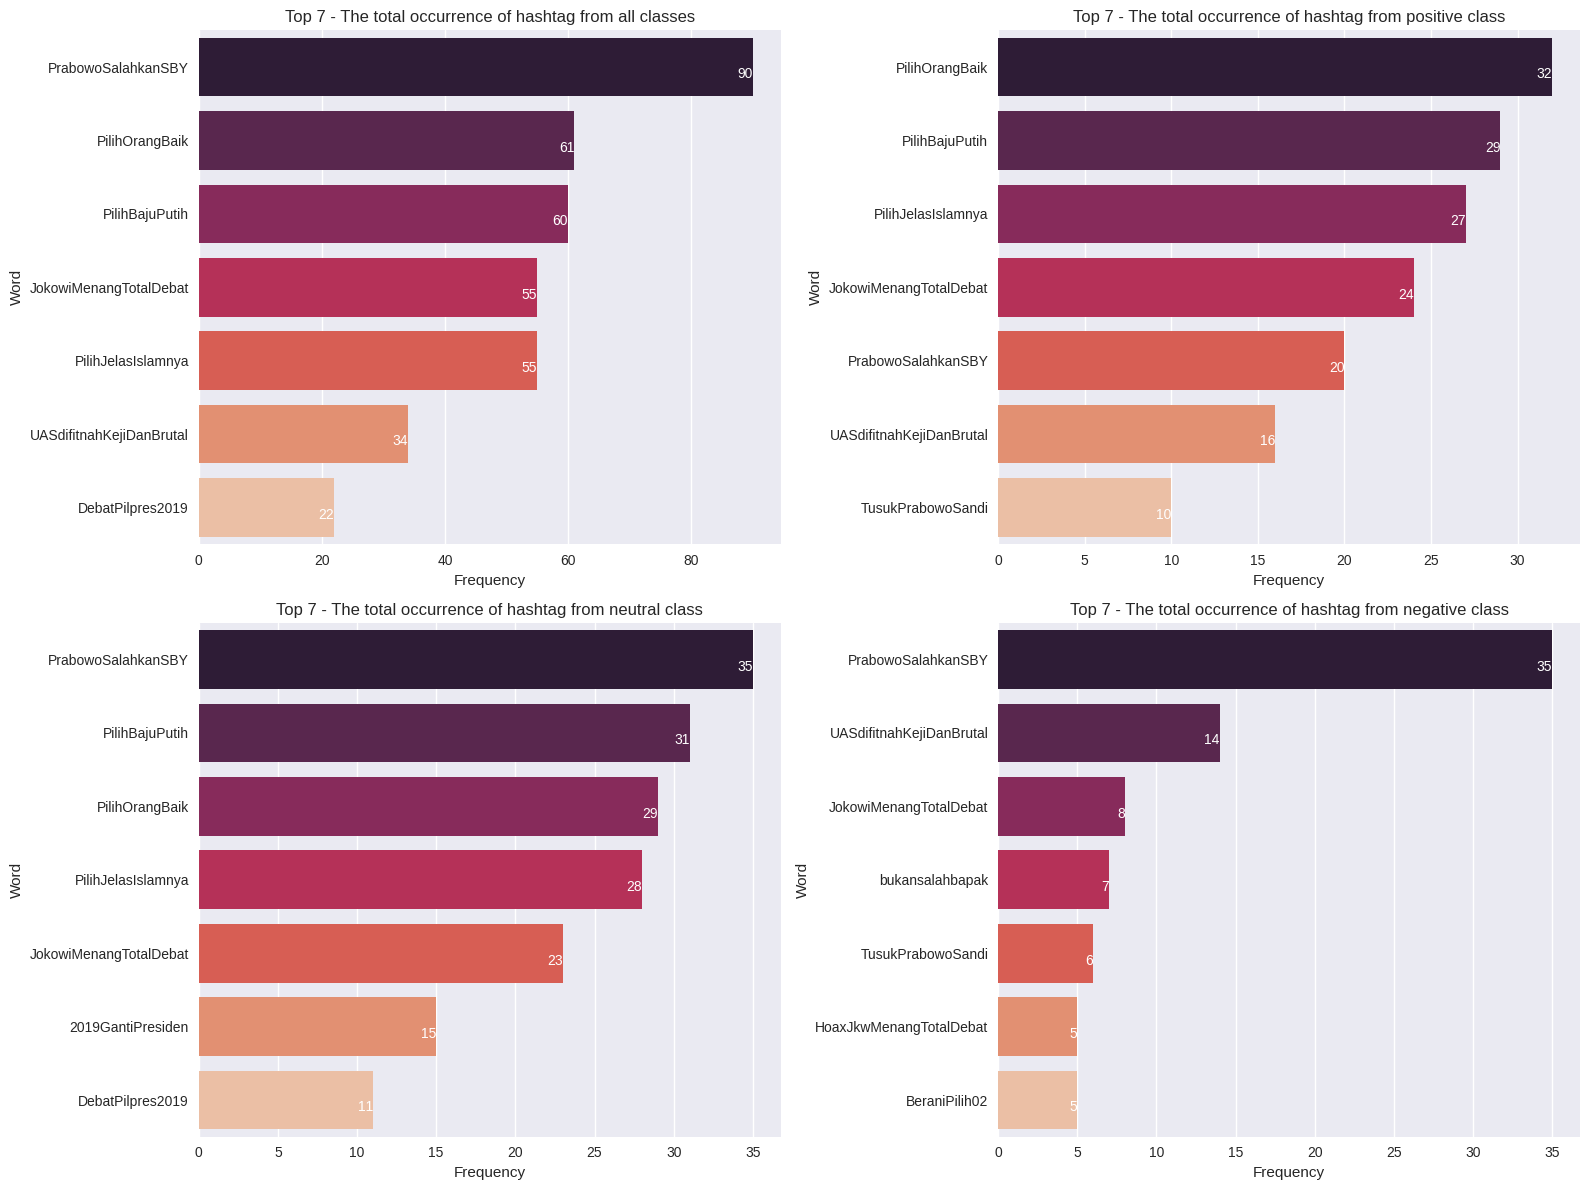

In [ ]:
# Contoh penggunaan
plot_data = [

    {'data': hashtag_all, 'title': 'Top 7 - The total occurrence of hashtag from all classes'},

    {'data': hashtag_positive, 'title': 'Top 7 - The total occurrence of hashtag from positive class'},

    {'data': hashtag_neutral, 'title': 'Top 7 - The total occurrence of hashtag from neutral class'},

    {'data': hashtag_negative, 'title': 'Top 7 - The total occurrence of hashtag from negative class'}
]

plot_to_graph(plot_data)

🚧 Based on the image above, the majority of hashtags do not describe or support a sentiment category, such as in the positive class only `#PilihOrangBaik` supports the positive class category while the others are not included. Based on the findings above, I will remove hashtags in the preprocessing stage later because hashtags do not play an important role in supporting sentiment categories

# 🎯 **Step 8: Check the most frequently used emojis and understand its impact**

---



🔎 At this stage I will only show the 7 most frequently used emojis

In [ ]:
emoji_unicode_list = df_emoji['emoji-unicode'].tolist()

🚧 The code above will produce the following output

```Python
['ðŸ˜„', 'ðŸ˜ƒ', 'ðŸ˜€', 'ðŸ˜Š', 'â˜ºï¸\x8f', ....]
```



In [ ]:
emoji_for_regex = '|'.join(re.escape(emoji) for emoji in emoji_unicode_list)


del emoji_unicode_list

🚧 The code above functions to convert the `emoji_unicode_list` output into a regex (regular expression) pattern that can be used to match text containing emoji. Following are the output results from the coding above


```Python
'ðŸ˜„|ðŸ˜ƒ|ðŸ˜€|ðŸ˜Š|â˜ºï¸\x8f|....'
```



In [ ]:
emoji_for_symbol_mapping = {unicode: symbol for unicode, symbol in zip(df_emoji['emoji-unicode'], df_emoji['emoji-symbol'])}

🚧 Creates a mapping between unicode values and their corresponding emoji symbols. The following are the output results

```Python
{'ðŸ˜„': '😄',
 'ðŸ˜ƒ': '😃',
 'ðŸ˜€': '😀',
 'ðŸ˜Š': '😊',
 'â˜ºï¸\x8f': '🙂',
  ....
}
```



In [ ]:
def emoji_extract(tweet):

    emojis = re.findall(emoji_for_regex, tweet)

    return emojis

def offset_image(cords, emoji, ax):

    img = plt.imread(imojify.get_img_path(emoji))

    im = OffsetImage(img, zoom=0.05)

    im.image.axes = ax

    ab = AnnotationBbox(im, (cords[0], cords[1]), frameon=False, pad=0)

    ax.add_artist(ab)

def plot_emoji(plot_data):

    fig, axes = plt.subplots(2, 2, figsize=(12, 7))

    for i, plot_info in enumerate(plot_data):

        emjis = plot_info['data']['Word']

        values = plot_info['data']['Frequency']

        title = plot_info['title']

        ax = axes[i // 2, i % 2]

        ax.bar(range(len(emjis)), values, width=0.5, align="center")

        ax.set_xticks(range(len(emjis)))

        ax.set_xticklabels([])

        ax.tick_params(axis='x', which='major', pad=26)

        ax.set_ylim((0, ax.get_ylim()[1] + 10))

        for j, e in enumerate(emjis):

            offset_image([j, values[j] + 5], e, ax)

        ax.set_title(title, fontsize=12)

    plt.show()


In [ ]:
emoji_all = df_sentiment['tweet'].apply(emoji_extract)

emoji_positive = df_positive['tweet'].apply(emoji_extract)

emoji_neutral = df_neutral['tweet'].apply(emoji_extract)

emoji_negative = df_negative['tweet'].apply(emoji_extract)

🚧 The result of the coding above is an array within an array, as follows

```Python
0       [ðŸ‘‡, ðŸ˜œ]
1                 []
2                 []
3                 []
4                 []
            ...     
```



In [ ]:
emoji_all = [emoji for emojis_list in emoji_all for emoji in emojis_list]

emoji_positive = [emoji for emojis_list in emoji_positive for emoji in emojis_list]

emoji_neutral = [emoji for emojis_list in emoji_neutral for emoji in emojis_list]

emoji_negative = [emoji for emojis_list in emoji_negative for emoji in emojis_list]


🚧 The code above functions to take the unicode emoji and make it into a list The result of the coding above is an array within an array, as follows

```Python
['ðŸ‘‡',
 'ðŸ˜œ',
 'ðŸ˜‚',
 'ðŸ™\x8f',
 'ðŸ‘\x8d',
 ....
]
```



In [ ]:
emoji_all = [emoji_for_symbol_mapping.get(unicode, unicode) for unicode in emoji_all]

emoji_positive = [emoji_for_symbol_mapping.get(unicode, unicode) for unicode in emoji_positive]

emoji_neutral = [emoji_for_symbol_mapping.get(unicode, unicode) for unicode in emoji_neutral]

emoji_negative = [emoji_for_symbol_mapping.get(unicode, unicode) for unicode in emoji_negative]

🚧 The code above aims to change the unicode obtained from the previous step into emoji.

```Python
['👇',
 '😜',
 '😂',
 '🙏',
 '👍',
 ....
]
```



In [ ]:
emoji_all = convert_to_dataframe(Counter(emoji_all))

emoji_positive = convert_to_dataframe(Counter(emoji_positive))

emoji_neutral = convert_to_dataframe(Counter(emoji_neutral))

emoji_negative = convert_to_dataframe(Counter(emoji_negative))

🚧 The result of the coding above is an array within an array, as follows:

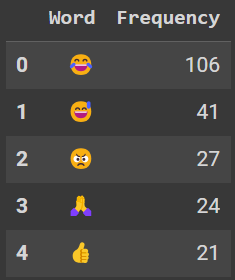

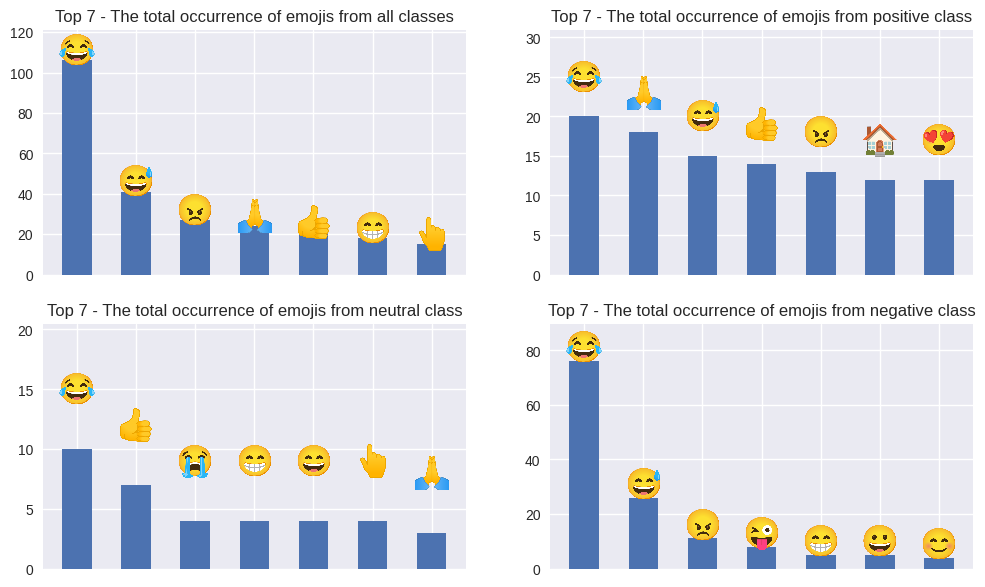

In [ ]:
# Contoh penggunaan
plot_data = [

    {'data': emoji_all, 'title': 'Top 7 - The total occurrence of emojis from all classes'},

    {'data': emoji_positive, 'title': 'Top 7 - The total occurrence of emojis from positive class'},

    {'data': emoji_neutral, 'title': 'Top 7 - The total occurrence of emojis from neutral class'},

    {'data': emoji_negative, 'title': 'Top 7 - The total occurrence of emojis from negative class'}
]

plot_emoji(plot_data)

🚧 Based on the image information above, there is an interesting thing, namely the `😂` emoji is in every class category and occupies the first position as the frequently used emoji. Apart from that, it can also be understood that the impact of the emojis from each class is not very impactful because there are no emojis that represent or support the class category so later I will remove them in the data preprocessing stage.

# 🎯 **Step 9: Check the most frequently used @ and understand its impact**

---



In [ ]:
def mention_extract(x):

    mentions = []

    for i in x:

        mention = re.findall(r"@(\w+)", i)

        mentions.extend(mention)

    return mentions

In [ ]:
mentions_all = mention_extract(df_sentiment['tweet'])

mentions_positive = mention_extract(df_positive['tweet'])

mentions_neutral = mention_extract(df_neutral['tweet'])

mentions_negative = mention_extract(df_negative['tweet'])

🚧 The result of the coding above is an array within an array, as follows


```Python
['prabowo',
 'rockygerung',
 'jokowi',
 'SBYudhoyono',
 'yunartowijaya',
 ....
]
```



In [ ]:
mentions_all = convert_to_dataframe(Counter(mentions_all))

mentions_positive = convert_to_dataframe(Counter(mentions_positive))

mentions_neutral = convert_to_dataframe(Counter(mentions_neutral))

mentions_negative = convert_to_dataframe(Counter(mentions_negative))

🚧 The output results from the code above are as follows

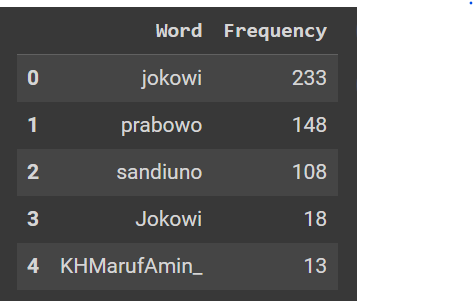

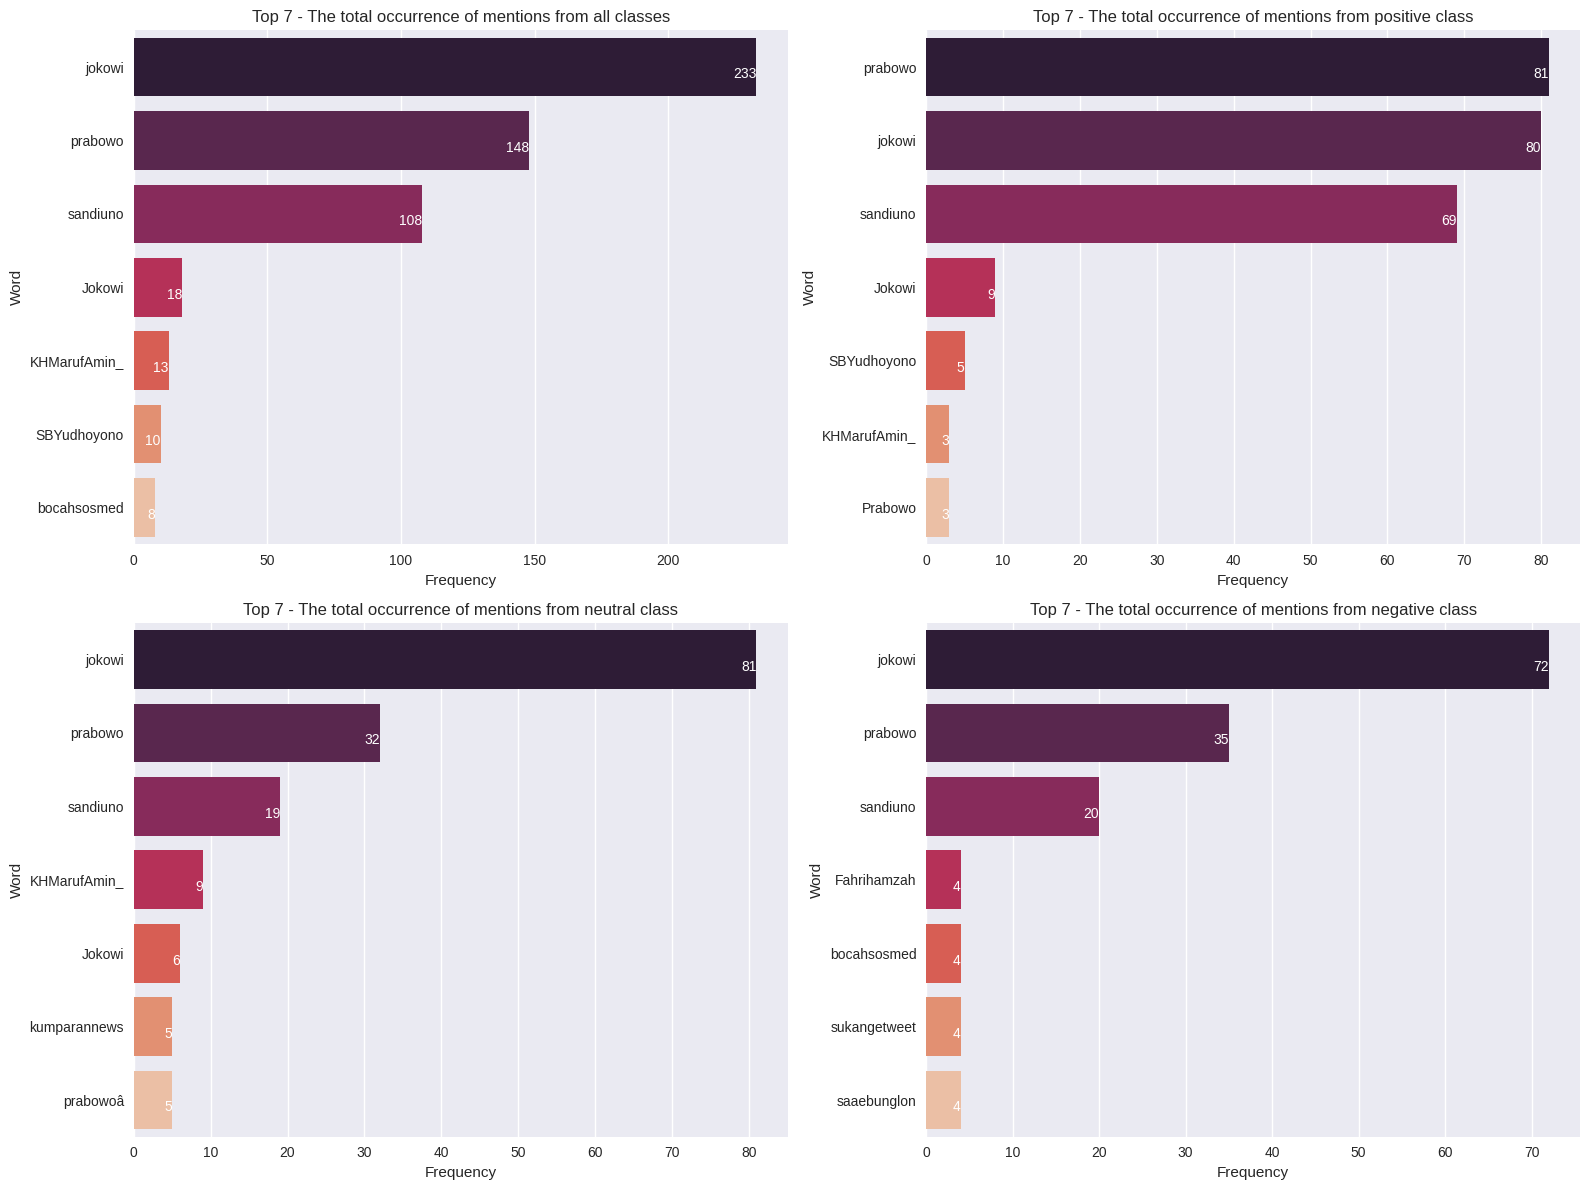

In [ ]:
# Contoh penggunaan
plot_data = [

    {'data': mentions_all, 'title': 'Top 7 - The total occurrence of mentions from all classes'},

    {'data': mentions_positive, 'title': 'Top 7 - The total occurrence of mentions from positive class'},

    {'data': mentions_neutral, 'title': 'Top 7 - The total occurrence of mentions from neutral class'},

    {'data': mentions_negative, 'title': 'Top 7 - The total occurrence of mentions from negative class'}
]

plot_to_graph(plot_data)

🚧 Based on the image above, it can be seen that mentions do not play a role in presenting the category of a sentiment, so I will delete these metions.

# ✅ **Conclusion**

---


- **Deleted** <br>
  Based on the EDA process, I will remove parts of words that do not represent or support the sentiment category and here are the things I removed
  - link
  - numbers (including dates)
  - `@`
  - `#`
  - emoticons
  - delete unnecessary words with stopwords
- **Word replacement** <br>
  In this section, I will replace abbreviations and slang words with real words to make sentences easier to understand.
- There are words that have double letters so they need to be deleted
- I will not do undersampling or oversampling because the difference in the amount of data for each class is not much different

- https://www.kaggle.com/code/bhaveshkumar2806/complete-eda-and-visualization-of-text-data
- https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
- https://www.kaggle.com/discussions/getting-started/186154
- https://www.kaggle.com/code/gauravduttakiit/pos-tagging-part-3
- https://www.kaggle.com/discussions/getting-started/203555

In [ ]:
1 + 3 == 4

True

In [ ]:
1.1 + 2.2 == 3.3

False